In [14]:
import sys
sys.path.append('../../src')
from modules import *
from columns import *
sys.path.append('../../src/python')
from PCA import *
from random_funks import *

In [15]:
data=pd.read_csv('../../data/PAH_PCB_OCP.csv',index_col=0)

In [16]:
kols=PCB_kol+PAH_kol+OCP_kol

In [17]:
data.set_index('LOKACIJA', inplace=True)

In [18]:
data.index

Index(['Kuželj-Gorski kotar', 'Iševnica- Gorski kotar', 'centar Karlovca',
       'ušće u Kupu', 'Zagrebačka županija', 'Stubičke Toplice', ' Istra',
       ' Istra', ' Istra',
       'Jurovo - Jurovski Brod (utok Lahinje - lijevi pritok)', 'Ozalj',
       'Metković-Doljani', 'Metković-Unka', 'Metković-most', 'ušće', 'Mijači',
       'Striježevica', 'Petrinja (kupalište)', 'Sisak (Stari grad)',
       'Sisak (Stari grad)', 'Zagreb (Savski Kamenji - toplana)',
       'Prošćansko jezero', 'Belavići-kamp Slapić',
       'Duga Resa-gradsko kupalište', 'Severin na Kupi-kupalište Klanac',
       'Ozalj-gradsko kupalište', 'Slunj-kupalište Rastoke',
       'Karlovac-Foginovo kupalište'],
      dtype='object', name='LOKACIJA')

In [19]:
data_t=data.transpose()

In [20]:
pca_data_lokacije=data_t.loc[kols,:]

(35, 28)
(3, 28)
Length of indx: 3
Length of explained_variance: 3


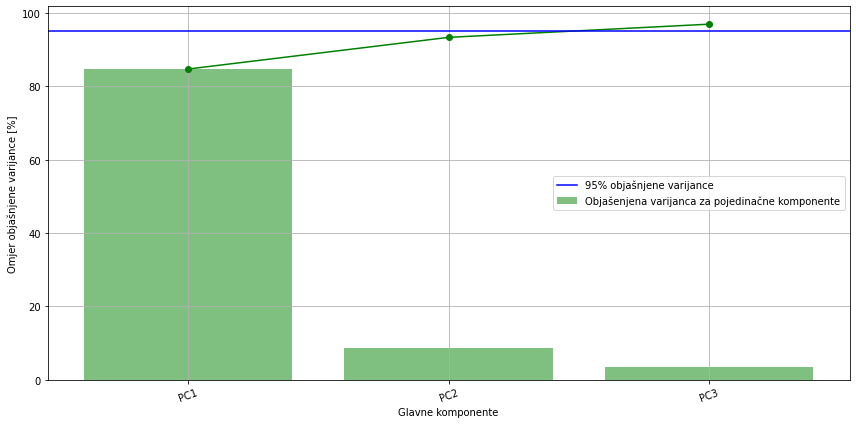

In [21]:
pca_c_lokacije=pca_a(pca_data_lokacije,3)

In [22]:
pca_3d(pca_c_lokacije)

In [26]:
pca_c_lokacije_klasteri, fig  = kmeans_3d(pca_c_lokacije, broj_klastera=3)

/home/ivana/repozitorij/diplomski/ivana_dip/dipenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [27]:
pca_c_lokacije_klasteri

,polutant,PC1,PC2,PC3,Klaster
0,Kuželj-Gorski kotar,0.203325,0.033905,-0.002776,1
1,Iševnica- Gorski kotar,0.184893,0.135615,0.322333,3
2,centar Karlovca,0.199836,-0.031456,0.045952,2
3,ušće u Kupu,0.167659,-0.166268,0.484328,3
4,Zagrebačka županija,0.193481,-0.186747,-0.014164,2
5,Stubičke Toplice,0.195843,-0.137595,-0.099176,2
6,Istra,0.183580,0.271281,-0.111023,1
7,Istra,0.176061,0.317635,-0.087860,1
8,Istra,0.193978,0.192501,-0.036419,1
9,Jurovo - Jurovski Brod (utok Lahinje - lijevi ...,0.193493,0.198116,0.111763,1


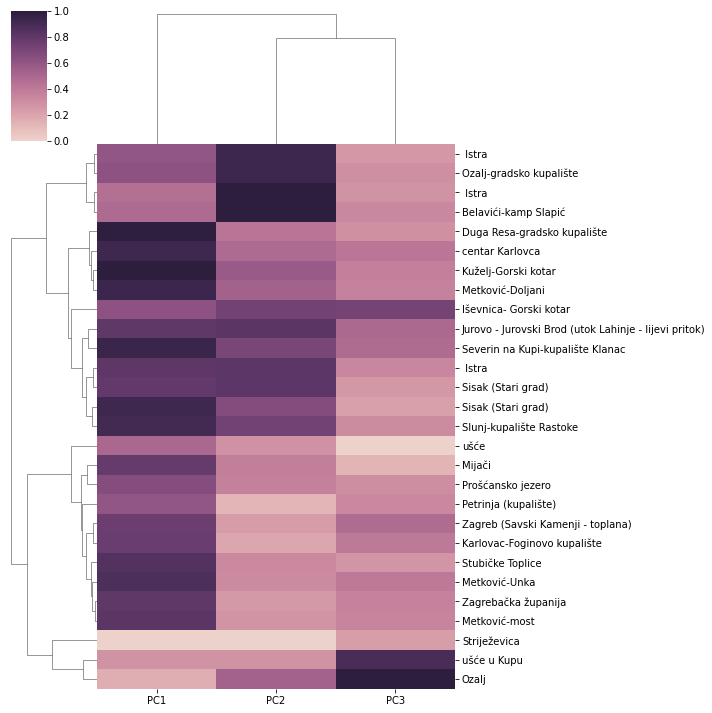

In [30]:
# Create a cluster map with seaborn, specifying yticklabels to automatically use the 'polutant' column.
# This command automatically clusters rows and columns, then displays the heatmap and dendrogram.
custom_cmap = sns.cubehelix_palette(as_cmap=True)

g = sns.clustermap(pca_c_lokacije_klasteri[['PC1', 'PC2', 'PC3']],
                  # figsize=(5, 5),  # Adjust the figure size as needed
                   row_cluster=True,
                   col_cluster=True,
                   metric="euclidean",
                   method="ward",
                   cmap=custom_cmap,
                   standard_scale=1,
                   yticklabels=pca_c_lokacije_klasteri['polutant'].tolist())  # Pass the list of pollutant names directly

# Rotate y-tick labels for better visibility if necessary
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)  # Rotate y-tick labels to horizontal

# Show the plot
plt.show()